## 관련 라이브러리 실습

In [87]:
# pandas 기초

import pandas as pd
pd.__version__

'1.4.2'

In [99]:
# Series 자료형 실습 

## list를 이용하여 Series 생성
d1 = [1, 2, 3, 4, 5]
print(type(d1))
sr1 = pd.Series(d1)
print(sr1)
print(type(sr1))

<class 'list'>
0    1
1    2
2    3
3    4
4    5
dtype: int64
<class 'pandas.core.series.Series'>


In [102]:
## 인덱스를 별도로 지정하기
d2 = [6, 7, 8, 9, 10]
sr2 = pd.Series(d1, index=d2)
print(sr2)

0     6
1     7
2     8
3     9
4    10
dtype: int64


In [103]:
## Series 인덱싱
# sr2[1]

print(sr1 + sr2)

0     7
1     9
2    11
3    13
4    15
dtype: int64


In [111]:
# DataFrame 자료형 실습
data_dic = {
    'year': [2020, 2021, 2022],
    'sales' : [100, 200, 300]
}
print(data_dic)
df1 = pd.DataFrame(data_dic)
#df1
df2 = pd.DataFrame([[89.2, 92.5, 90.8], [92.8, 89.9, 95.2]], index=['중간고사', '기말고사'], columns=['1반', '2반', '3반'])
#df2

{'year': [2020, 2021, 2022], 'sales': [100, 200, 300]}


In [110]:
## 값 조회
df1.head(2)
#df2['1반']

,year,sales
0,2020,100
1,2021,200


In [114]:
# csv 파일로 저장하기
df2.to_csv('./score.csv', header = 'False', encoding='cp949')

In [115]:
# csv 파일을 DataFrame 으로 불러오기
df4 = pd.read_csv('./score.csv', encoding='cp949', index_col=0, engine='python')
df4

,1반,2반,3반
중간고사,89.2,92.5,90.8
기말고사,92.8,89.9,95.2


In [116]:
# matplotlib 기초
import matplotlib
matplotlib.__version__

'3.5.2'

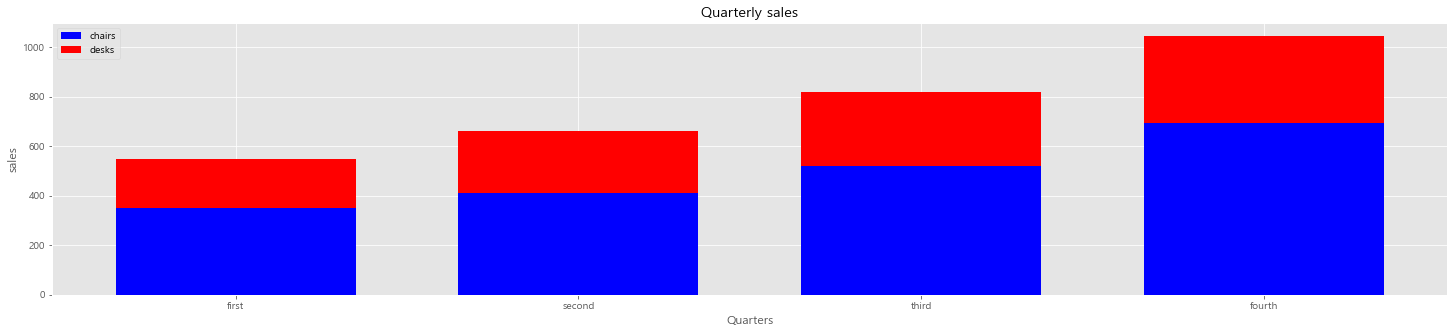

In [118]:
## bar 차트 그리기
import matplotlib.pyplot as plt

y1 = [350, 410, 520, 695]
y2 = [200, 250, 300, 350]
x = range(len(y1))

plt.bar(x, y1, width = 0.7, color = 'blue')
plt.bar(x, y2, width = 0.7, color = 'red', bottom = y1)
plt.title('Quarterly sales')
plt.xlabel('Quarters')
plt.ylabel('sales')
xLabel = ['first', 'second', 'third', 'fourth']
plt.xticks(x, xLabel, fontsize = 10)
plt.legend(['chairs', 'desks'])
plt.show()

## 샘플 문제

* 데이터 수집하기
  - 보건복지부_공공보건 의료기관 현황 데이터 [링크](https://www.data.go.kr/data/15004305/fileData.do)  

In [1]:
import pandas as pd
import numpy as np

# pandas error, warning 무시 옵션 설정
pd.set_option('mode.chained_assignment', None)

# .csv 파일 가져오기
data = pd.read_csv('./20161231.csv', index_col=0, encoding='cp949', engine='python')

# data 객체의 상위 다섯 개 행의 데이터 출력
data.head()

,병원 명,설립형태,근거 법령,관계 행정기관,관계 공공단체,심평원 요양기관번호,종별구분,병상수,소재지 우편번호,주소,홈페이지,대표전화,FAX,비고
연번,,,,,,,,,,,,,,
1,강원도 재활병원,시도립,강원도재활병원설치및운영에관한조례,강원도,해당없음,32200641,병원,165,24227,강원도 춘천시 충열로 142번길 24-16,www.grh.or.kr,033-248-7700,033-248-7723,NaN
2,강원도 삼척의료원,특수법인,지방의료원의 설립 및 운영에 관한 법률,보건복지부(강원도),지방의료원,32100060,종합병원,152,25920,강원도 삼척시 오십천로 418,http://ksmc.or.kr,033-572-1141,033-573-8424,NaN
3,강원도 영월의료원,특수법인,지방의료원의 설립 및 운영에 관한 법률,보건복지부(강원도),지방의료원,32100078,종합병원,214,26234,강원도 영월군 영월읍 중앙1로 59,http://www.youngwol.org,033-370-9117,033-370-9137,NaN
4,강원도 원주의료원,특수법인,지방의료원의 설립 및 운영에 관한 법률,보건복지부(강원도),지방의료원,32100086,종합병원,237,26448,강원도 원주시 서원대로 387(개운동),www.kwmc.or.kr,033-760-4500,033-761-5121,NaN
5,강원도 강릉의료원,특수법인,지방의료원의 설립 및 운영에 관한 법률,보건복지부(강원도),지방의료원,32100159,종합병원,137,25535,강원도 강릉시 경강로 2007(남문동 164-1),http://www.gnmc.or.kr,033-646-6910,033-610-1415,NaN


In [124]:
# 주소에서 시도, 군구 정보 분리

# apply() 함수는 데이터프레임의 행 또는 열 또는 전체 셀에 원하는 연산
addr = pd.DataFrame(data['주소'].apply(lambda v: v.split()[:2]).tolist(), columns = ('시도', '군구'))

addr.head()

,시도,군구
0,강원도,춘천시
1,강원도,삼척시
2,강원도,영월군
3,강원도,원주시
4,강원도,강릉시


In [4]:
# 시도 이름에서 잘못된 내용이 있는지 확인하기 위해 시도 이름의 유일한 값을 출력하여 확인함

addr['시도'].unique()

array(['강원도', '경기도', '경기', '경남', '창원시', '경상남도', '경상북도', '경산시', '경북',
       '인천광역시', '대구광역시', '전라남도', '대전광역시', '광주광역시', '제주특별자치도', '부산광역시',
       '전라북도', '충북', '서울특별시', '서울시', '부산특별시', '대전시', '충남', '전남', '충청남도',
       '울산광역시', '전북', '천안시', '충청북도'], dtype=object)

In [5]:
# 시도가 아닌 군구에 해당하는 정보를 수정하기
addr[addr['시도'] == '창원시']

,시도,군구
27,창원시,의창구
31,창원시,마산합포구3.15대로


In [6]:
# .iloc[] 데이터프레임의 행이나 컬럼의 인덱스 값으로 접근
addr.iloc[27] = ['경상남도', '창원시']
addr.iloc[31] = ['경상남도', '창원시']

In [7]:
addr.iloc[27]

시도    경상남도
군구     창원시
Name: 27, dtype: object

In [8]:
addr.iloc[31]

시도    경상남도
군구     창원시
Name: 31, dtype: object

In [10]:
addr[addr['시도'] == '경산시']

,시도,군구
47,경산시,경안로


In [11]:
addr.iloc[47] = ['경상북도', '경산시']

In [12]:
addr.iloc[47]

시도    경상북도
군구     경산시
Name: 47, dtype: object

In [13]:
addr[addr['시도'] == '천안시']

,시도,군구
209,천안시,동남구
210,천안시,동남구


In [14]:
addr.iloc[209] = ['충청남도', '천안시']
addr.iloc[210] = ['충청남도', '천안시']

In [15]:
addr.iloc[209]

시도    충청남도
군구     천안시
Name: 209, dtype: object

In [16]:
addr.iloc[210]

시도    충청남도
군구     천안시
Name: 210, dtype: object

In [17]:
addr['시도'].unique()

array(['강원도', '경기도', '경기', '경남', '경상남도', '경상북도', '경북', '인천광역시', '대구광역시',
       '전라남도', '대전광역시', '광주광역시', '제주특별자치도', '부산광역시', '전라북도', '충북',
       '서울특별시', '서울시', '부산특별시', '대전시', '충남', '전남', '충청남도', '울산광역시', '전북',
       '충청북도'], dtype=object)

In [19]:
# 축약된 이름을 정확한 이름으로 변경하기
# 딕셔너리로 만들어서 키에 해당하는 값을 가져오기
addr_aliases = {'경기':'경기도', '경남':'경상남도', '경북':'경상북도', '충북':'충청북도', '서울시':'서울특별시', '부산특별시':'부산광역시', '대전시':'대전광역시', '충남':'충청남도', '전남':'전라남도', '전북':'전라북도'}
addr['시도'] = addr['시도'].apply(lambda v: addr_aliases.get(v, v))
addr['시도'].unique()

array(['강원도', '경기도', '경상남도', '경상북도', '인천광역시', '대구광역시', '전라남도', '대전광역시',
       '광주광역시', '제주특별자치도', '부산광역시', '전라북도', '충청북도', '서울특별시', '충청남도',
       '울산광역시'], dtype=object)

In [20]:
addr['군구'].unique()

array(['춘천시', '삼척시', '영월군', '원주시', '강릉시', '속초시', '정선군', '수원시', '이천시',
       '안성시', '의정부시', '포천시', '파주시', '용인시', '평택시', '시흥시', '여주시', '남양주시',
       '동두천시', '안산시', '부천시', '통영시', '사천시', '창원시', '김해시', '양산시', '거창군',
       '남해군', '의령군', '포항시', '김천시', '안동시', '울진군', '경주시', '구미시', '영주시',
       '상주시', '문경시', '경산시', '의성군', '청도군', '고령군', '칠곡군', '봉화군', '울릉군',
       '부평구', '북구', '순천시', '대덕구', '태백시', '동해시', '화성시', '광산구', '남구', '중구',
       '아란13길', '서구', '전주시', '진주시', '청주시', '종로구', '성남시', '동구', '화순군',
       '강동구', '사상구', '달서구', '해운대구', '유성구', '가평군', '양주시', '고양시', '홍천군',
       '양구군', '청원군', '계룡시', '논산시', '함평군', '양평군', '수성구', '달성군', '연수구',
       '노원구', '기장군', '공주시', '강북구', '광진구', '나주시', '창녕군', '목포시', '고흥군',
       '연제구', '동매로', '서초구', '은평구', '중랑구', '강남구', '동작구', '동대문구', '양천구',
       '성동구', '송파구', '울주군', '계양구', '옹진군', '보성군', '광양시', '영광군', '무안군',
       '진도군', '강진군', '곡성군', '여수시', '신안군', '장성군', '완주군', '부안군', '정읍시',
       '남원시', '군산시', '고창군', '진안군', '제주시', '서귀포시', '천안시', '보령시', '서산시',
       '서천

In [21]:
addr[addr['군구'] == '아란13길']

,시도,군구
75,제주특별자치도,아란13길


In [23]:
addr.iloc[75] = ['제주특별자치도', '제주시']

In [26]:
addr.iloc[75]

시도    제주특별자치도
군구        제주시
Name: 75, dtype: object

In [132]:
# 행정구역별 공공보건의료기관 수 구하기
# 행 단위로 집계하기 위해 axis = 1 로 설정
addr['시도군구'] = addr.apply(lambda r: r['시도'] + ' ' + r['군구'], axis = 1)
addr.head()

,시도,군구,count,시도군구
0,강원도,춘천시,0,강원도 춘천시
1,강원도,삼척시,0,강원도 삼척시
2,강원도,영월군,0,강원도 영월군
3,강원도,원주시,0,강원도 원주시
4,강원도,강릉시,0,강원도 강릉시


In [133]:
# count 열 만들기
addr['count'] = 0
addr.head()

,시도,군구,count,시도군구
0,강원도,춘천시,0,강원도 춘천시
1,강원도,삼척시,0,강원도 삼척시
2,강원도,영월군,0,강원도 영월군
3,강원도,원주시,0,강원도 원주시
4,강원도,강릉시,0,강원도 강릉시


In [134]:
# groupby 로 지역 그룹별 집계내기
addr_group = pd.DataFrame(addr.groupby(['시도', '군구', '시도군구'], as_index = False).count())
addr_group.head()

,시도,군구,시도군구,count
0,강원도,강릉시,강원도 강릉시,4
1,강원도,동해시,강원도 동해시,1
2,강원도,삼척시,강원도 삼척시,1
3,강원도,속초시,강원도 속초시,1
4,강원도,양구군,강원도 양구군,1


In [31]:
# 인덱스를 시도군구로 변경
addr_group = addr_group.set_index('시도군구')
addr_group.head()

,시도,군구,count
시도군구,,,
강원도 강릉시,강원도,강릉시,4
강원도 동해시,강원도,동해시,1
강원도 삼척시,강원도,삼척시,1
강원도 속초시,강원도,속초시,1
강원도 양구군,강원도,양구군,1


* 데이터 수집하기
  - 국가통계포털 [링크](https://kosis.kr/index/index.do) 에서 행정구역 검색 > 행정구역(시군구)별, 성별 인구수
  - 엑셀 프로그램에서 데이터 전처리

In [62]:
# 인구수 데이터 불러오기
# 인구수에 , 가 표시된 부분을 삭제하여, 숫자로 입력함 thousands
popul = pd.read_csv('./20220725180047_2.csv', encoding='cp949', engine='python', thousands=',')
popul.head()

,시도,군구,총인구수 (명),남자인구수 (명),여자인구수 (명)
0,전국,소계,51578178,25711784,25866394
1,서울특별시,소계,9494807,4605655,4889152
2,서울특별시,종로구,143624,69513,74111
3,서울특별시,중구,122088,59364,62724
4,서울특별시,용산구,222263,106743,115520


In [63]:
# 시도군구 컬럼 만들기
# 군구 컬럼에 있는 데이터의 빈 칸 제거하기 .strip()
for e in range(0, len(popul)):
    popul['군구'][e] = popul['군구'][e].strip()
    
# 시도군구 컬럼을 만들기
popul['시도군구'] = popul.apply(lambda r: r['시도'] + ' ' + r['군구'], axis=1)

popul.head()

,시도,군구,총인구수 (명),남자인구수 (명),여자인구수 (명),시도군구
0,전국,소계,51578178,25711784,25866394,전국 소계
1,서울특별시,소계,9494807,4605655,4889152,서울특별시 소계
2,서울특별시,종로구,143624,69513,74111,서울특별시 종로구
3,서울특별시,중구,122088,59364,62724,서울특별시 중구
4,서울특별시,용산구,222263,106743,115520,서울특별시 용산구


In [64]:
# 컬럼값이 '소계'인 행은 제외
popul = popul[popul.군구 != '소계']

# 시도군구를 인덱스로 설정
popul = popul.set_index("시도군구")
popul.head()

,시도,군구,총인구수 (명),남자인구수 (명),여자인구수 (명)
시도군구,,,,,
서울특별시 종로구,서울특별시,종로구,143624,69513,74111
서울특별시 중구,서울특별시,중구,122088,59364,62724
서울특별시 용산구,서울특별시,용산구,222263,106743,115520
서울특별시 성동구,서울특별시,성동구,283821,138162,145659
서울특별시 광진구,서울특별시,광진구,339893,163920,175973


In [65]:
# 시도군구별 병원 수와 시도군구별 인구수 데이터 병합
# join, 양쪽 객체 모두가 공통으로 갖는 인덱스를 기준으로 가져옴
addr_popul_merge = pd.merge(addr_group, popul, how='inner', left_index=True, right_index=True)
addr_popul_merge.head()

,시도_x,군구_x,count,시도_y,군구_y,총인구수 (명),남자인구수 (명),여자인구수 (명)
시도군구,,,,,,,,
강원도 강릉시,강원도,강릉시,4,강원도,강릉시,212277,105308,106969
강원도 동해시,강원도,동해시,1,강원도,동해시,89574,45553,44021
강원도 삼척시,강원도,삼척시,1,강원도,삼척시,64165,32450,31715
강원도 속초시,강원도,속초시,1,강원도,속초시,82848,41100,41748
강원도 양구군,강원도,양구군,1,강원도,양구군,21607,11327,10280


In [66]:
# 필요한 컬럼만 추출
local_MC_Popul = addr_popul_merge[['시도_x', '군구_x', 'count', '총인구수 (명)']]
local_MC_Popul.head()

,시도_x,군구_x,count,총인구수 (명)
시도군구,,,,
강원도 강릉시,강원도,강릉시,4,212277
강원도 동해시,강원도,동해시,1,89574
강원도 삼척시,강원도,삼척시,1,64165
강원도 속초시,강원도,속초시,1,82848
강원도 양구군,강원도,양구군,1,21607


In [67]:
# 컬럼 이름 변경
local_MC_Popul = local_MC_Popul.rename(columns = {'시도_x':'시도', '군구_x':'군구', '총인구수 (명)':'인구수'})

# 인구수 대비 공공보건의료기관 비율 계산
MC_count = local_MC_Popul['count']
MC_count.head()
# axis = 0 은 행을 기준으로 레이블을 나눔
local_MC_Popul['MC_ratio'] = MC_count.div(local_MC_Popul['인구수'], axis = 0) * 100000

local_MC_Popul.head()

,시도,군구,count,인구수,MC_ratio
시도군구,,,,,
강원도 강릉시,강원도,강릉시,4,212277,1.884330
강원도 동해시,강원도,동해시,1,89574,1.116395
강원도 삼척시,강원도,삼척시,1,64165,1.558482
강원도 속초시,강원도,속초시,1,82848,1.207030
강원도 양구군,강원도,양구군,1,21607,4.628130


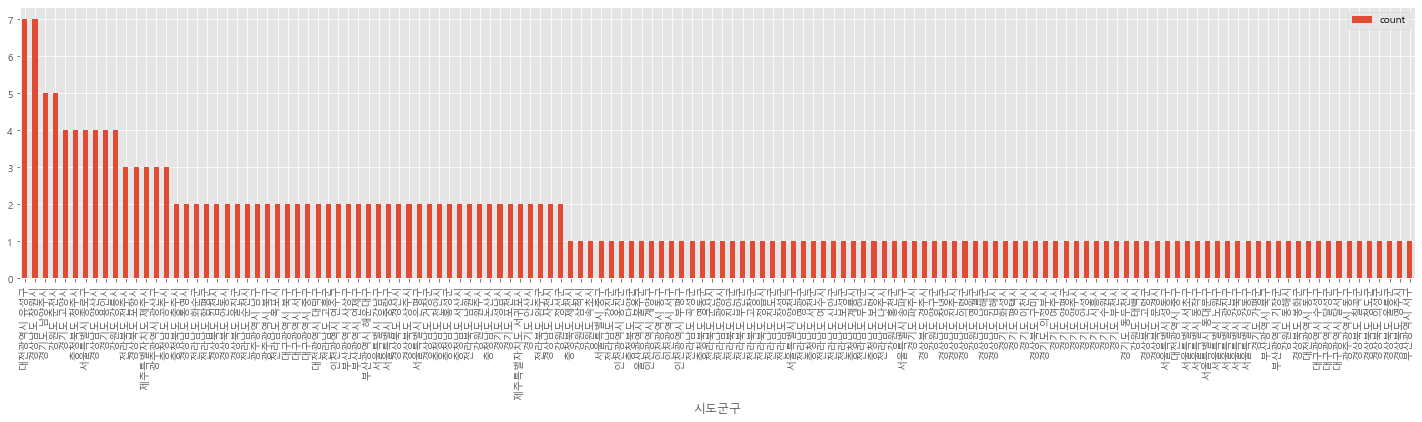

In [86]:
# 바 차트 그리기
from matplotlib import pyplot as plt

MC_ratio = local_MC_Popul[['count']]
MC_ratio = MC_ratio.sort_values('count', ascending = False)
MC_ratio.plot(kind='bar', rot = 90)
plt.show()